# EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

sns.set_theme(style="ticks")

## Read Dataset


The training dataset consists of over a million of anonymized hotel reservations, based on real data, with the following features:

- **user_id** - User ID
- **check-in** - Reservation check-in date
- **checkout** - Reservation check-out date
- **city_id** - city_id of the hotel’s city (anonymized)
- **device_class** - desktop/mobile
- **affiliate_id** - An anonymized ID of affiliate channels where the booker came from (e.g. direct, some third party referrals, paid search engine, etc.)
- **booker_country** - Country from which the reservation was made (anonymized)
- **hotel_country** - Country of the hotel (anonymized)
- **utrip_id** - Unique identification of user’s trip (a group of multi-destinations bookings within the same trip)

In [3]:
df_train = pd.read_csv('../data/Booking/booking_train_set.csv', 
                 dtype={"user_id": str, "city_id": str},
                      usecols=['user_id', 'city_id'])

df_train.head()

,user_id,city_id
0,1006220,31114
1,1006220,39641
2,1006220,20232
3,1006220,24144
4,1010293,5325


In [4]:
df = pd.read_csv('../data/Booking/booking_test_set.csv', 
                 dtype={"user_id": str, "city_id": str, 'affiliate_id': str,
                       'utrip_id': str},date_parser=['checkin', 'checkin'])

df.head(10)

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire
5,1000270,2016-02-09,2016-02-10,desktop,116,The Devilfire Empire,1000270_1,2,4,29207,Cobra Island
6,1000270,2016-02-10,2016-02-19,desktop,9924,The Devilfire Empire,1000270_1,3,4,44768,Cobra Island
7,1000270,2016-02-19,2016-02-20,desktop,9924,The Devilfire Empire,1000270_1,4,4,0,NaN
8,1000441,2016-06-01,2016-06-02,desktop,9924,Bartovia,1000441_1,2,5,46411,Osterlich
9,1000441,2016-06-02,2016-06-03,desktop,9924,Bartovia,1000441_1,3,5,52933,Osterlich


In [4]:
df.shape

(378667, 11)

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

## user_id

- **user_id** - User ID

In [5]:
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire


In [6]:
df_user_group = df.groupby('user_id').count()[['checkin']].sort_values('checkin',ascending=False)
#pd.concat([df_user_group.head(), df_user_group.tail()])

In [7]:
df_user_group.describe()

,checkin
count,68502.000000
mean,5.527824
std,2.306029
min,4.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,60.000000


In [17]:
df_train[df_train['user_id'] == '3604170']

,user_id,city_id
318289,3604170,56198
318290,3604170,44869
318291,3604170,21267
318292,3604170,36063
318293,3604170,33034
475695,3604170,21267
475696,3604170,36063
475697,3604170,44869
475698,3604170,56198
475699,3604170,33034


In [10]:
df_train_user = df_train[['user_id']].drop_duplicates()

In [15]:
df_same_user = df_user_group[df_user_group.index.isin(df_train_user['user_id'])]
df_same_user

,checkin
user_id,
4152137,60
2667263,46
3162447,44
1942330,43
870848,40
...,...
3595775,4
3597329,4
3606859,4


In [16]:
df_same_user.shape[0]/df_user_group.shape[0]

0.13862368981927534

In [9]:
#sns.histplot(df_user_group, x="checkin")

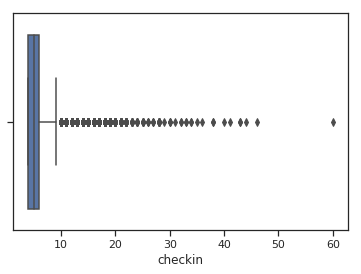

In [10]:
sns.boxplot(x="checkin", data=df_user_group)

## checkin - checkout

- **check-in** - Reservation check-in date
- **checkout** - Reservation check-out date

In [11]:
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire


In [25]:
df['checkin'] = pd.to_datetime(df['checkin'])
df['checkout'] = pd.to_datetime(df['checkout'])
df['checkin_month'] = df['checkin'].dt.month
df['duration'] = (df['checkout'] - df['checkin']).dt.days
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country,duration,checkin_month
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh,2,7
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh,2,7
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh,3,7
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN,3,7
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire,1,2


In [13]:
df_group_checkin = df.groupby('checkin').agg({'user_id': 'count', 'duration': 'mean'})
df_group_checkin['duration_7d'] = df_group_checkin['duration'].rolling(window=7).mean()
df_group_checkin.describe()

,user_id,duration,duration_7d
count,425.000000,425.000000,419.000000
mean,890.981176,1.721934,1.728099
std,655.608255,0.123677,0.093042
min,2.000000,1.000000,1.317094
25%,433.000000,1.645631,1.662225
50%,708.000000,1.727835,1.723778
75%,1040.000000,1.797742,1.790101
max,3092.000000,2.044534,1.991960


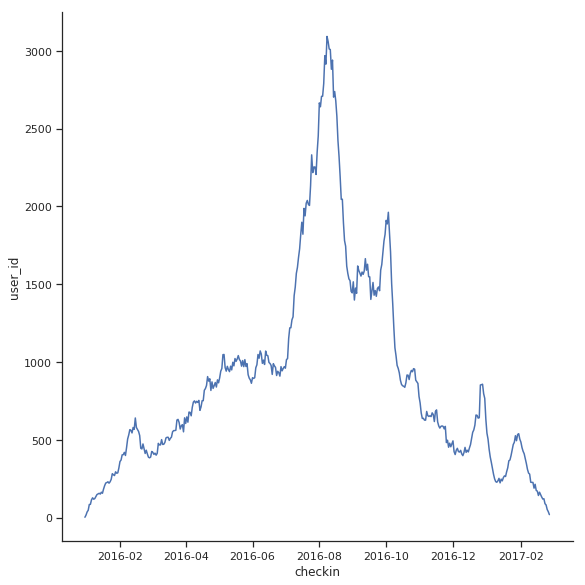

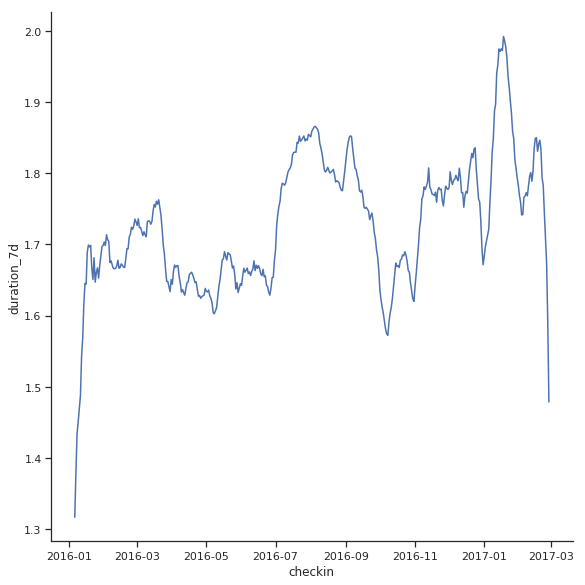

In [14]:

g = sns.relplot(
    data=df_group_checkin,
    x="checkin", y="user_id", kind="line", height=8
)

g = sns.relplot(
    data=df_group_checkin,
    x="checkin", y="duration_7d", kind="line", height=8
)

In [14]:
# Add sin/cos temporal features for checkin
#
#

## city_id 

- **city_id** - city_id of the hotel’s city (anonymized)


In [15]:
df.head()

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1


In [16]:
df_city_group = df.groupby('city_id').agg({'checkin': 'count', 'duration': 'mean'})\
                    .sort_values('checkin',ascending=False)

df_city_group.describe()

,checkin,duration
count,39901.000000,39901.000000
mean,29.243252,1.576285
std,218.801654,0.933283
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,1.250000
75%,9.000000,1.875000
max,11242.000000,22.000000


<AxesSubplot:xlabel='checkin'>

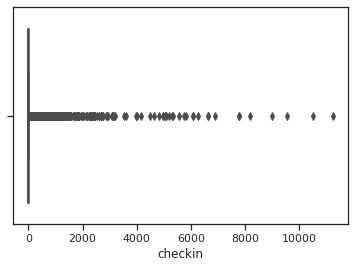

In [17]:
sns.boxplot(x="checkin", data=df_city_group)

<AxesSubplot:xlabel='duration'>

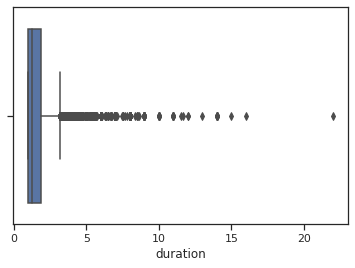

In [18]:
sns.boxplot(x="duration", data=df_city_group)

In [19]:
#df_city_group.sort_values(['duration'], ascending=False).head()

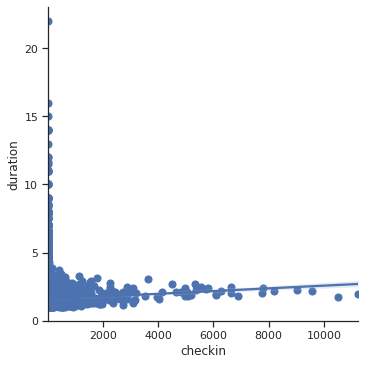

In [20]:
sns.lmplot(x="checkin", y="duration", data=df_city_group, 
           scatter_kws={"s": 50, "alpha": 1})

### Travel to cities per month

In [21]:
df['checkin_month'] = df.checkin.dt.month

In [22]:
df_city_month_group = df.groupby(['city_id', 'checkin_month']).agg({'checkin': 'count', 'duration': 'mean'})\
                    .reset_index().sort_values(['city_id', 'checkin_month', 'checkin'],ascending=False)
df_city_month_group

,city_id,checkin_month,checkin,duration
143226,9999,11,1,1.000000
143225,9999,8,1,2.000000
143224,9996,12,9,1.333333
143223,9996,11,22,1.681818
143222,9996,10,27,1.370370
...,...,...,...,...
4,10002,8,2,5.000000
3,10002,7,1,1.000000
2,10002,6,1,3.000000
1,10002,5,1,2.000000


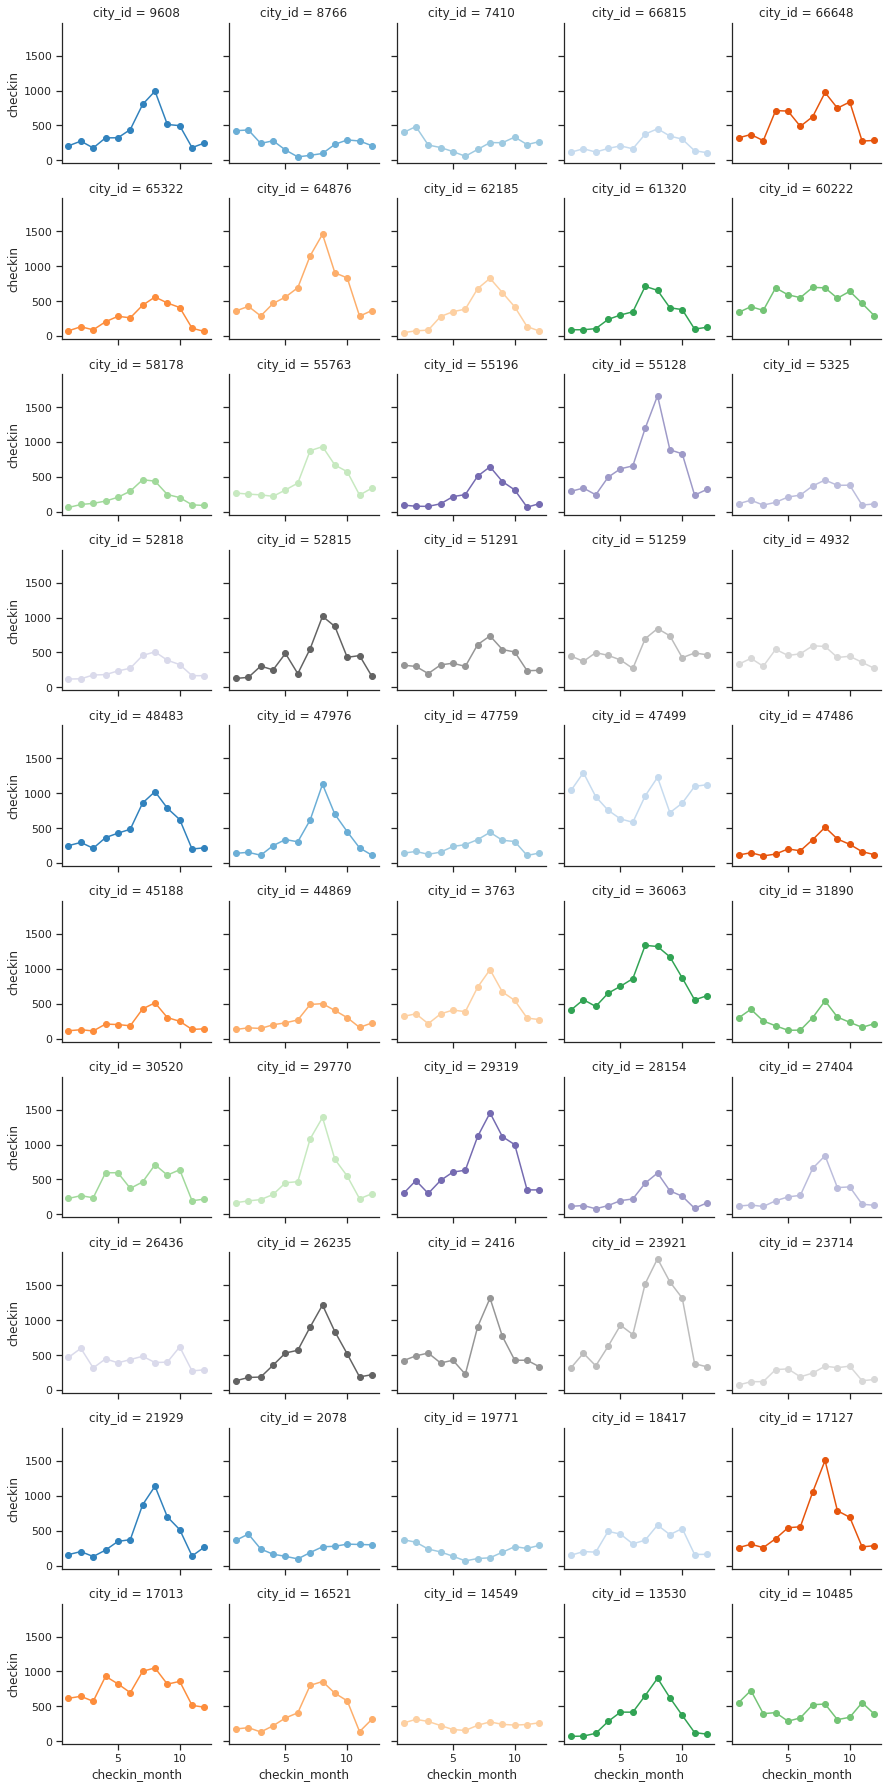

In [23]:
# Initialize a grid of plots with an Axes for each walk
city_idx = list(df_city_group.index)[:50]
df_plot  = df_city_month_group[df_city_month_group.city_id.isin(city_idx)]

grid     = sns.FacetGrid(df_plot, col="city_id", hue="city_id", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


## device_class 

- **device_class** - desktop/mobile


In [15]:
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country,duration
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh,2
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh,2
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh,3
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN,3
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire,1


In [16]:
df_device_group = df.groupby('device_class').agg({'checkin': 'count', 'duration': 'mean'})\
                    .sort_values('checkin',ascending=False)

df_device_group.describe()

,checkin,duration
count,3.000000,3.000000
mean,126222.333333,1.726806
std,109869.641486,0.080515
min,26402.000000,1.635411
25%,67362.000000,1.696578
50%,108322.000000,1.757746
75%,176132.500000,1.772504
max,243943.000000,1.787262


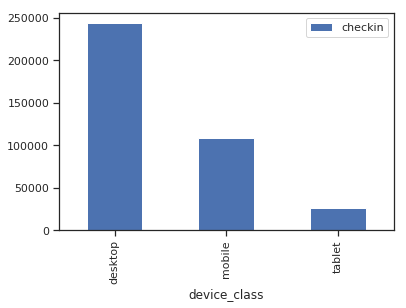

In [17]:
df_device_group[['checkin']].plot(kind='bar')

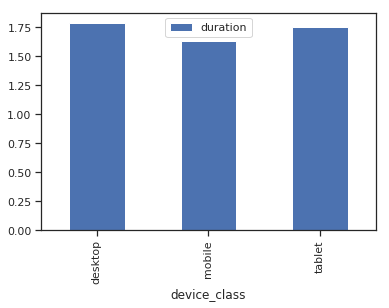

In [18]:
df_device_group[['duration']].plot(kind='bar')

## affiliate_id

- **affiliate_id** - An anonymized ID of affiliate channels where the booker came from (e.g. direct, some third party referrals, paid search engine, etc.)

In [19]:
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country,duration
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh,2
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh,2
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh,3
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN,3
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire,1


In [20]:
df_group_affiliate = df.groupby('affiliate_id').agg({'checkin': 'count', 'duration': 'mean'})\
                        .reset_index().sort_values('checkin',ascending=False)
df_group_affiliate.describe()

,checkin,duration
count,2023.000000,2023.000000
mean,187.180919,1.896103
std,2593.144250,1.139154
min,1.000000,1.000000
25%,2.000000,1.250000
50%,4.000000,1.674419
75%,15.000000,2.074537
max,90276.000000,25.000000


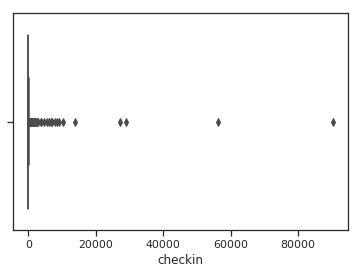

In [21]:
sns.boxplot(x="checkin", data=df_group_affiliate)

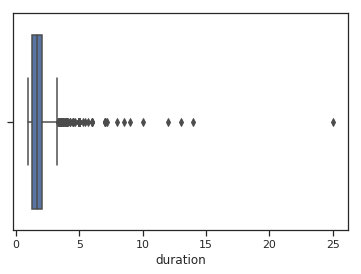

In [22]:
sns.boxplot(x="duration", data=df_group_affiliate)

In [26]:
df_affiliate_id_month_group = df.groupby(['affiliate_id', 'checkin_month']).agg({'checkin': 'count', 'duration': 'mean'})\
                    .reset_index().sort_values(['affiliate_id', 'checkin_month', 'checkin'],ascending=False)
df_affiliate_id_month_group

,affiliate_id,checkin_month,checkin,duration
7555,9988,8,2,1.000000
7554,9973,10,2,1.500000
7553,9973,9,2,1.000000
7552,9973,8,3,1.333333
7551,9973,7,4,1.000000
...,...,...,...,...
4,1000,3,1,2.000000
3,100,8,7,1.714286
2,100,7,2,4.000000
1,100,6,3,3.000000


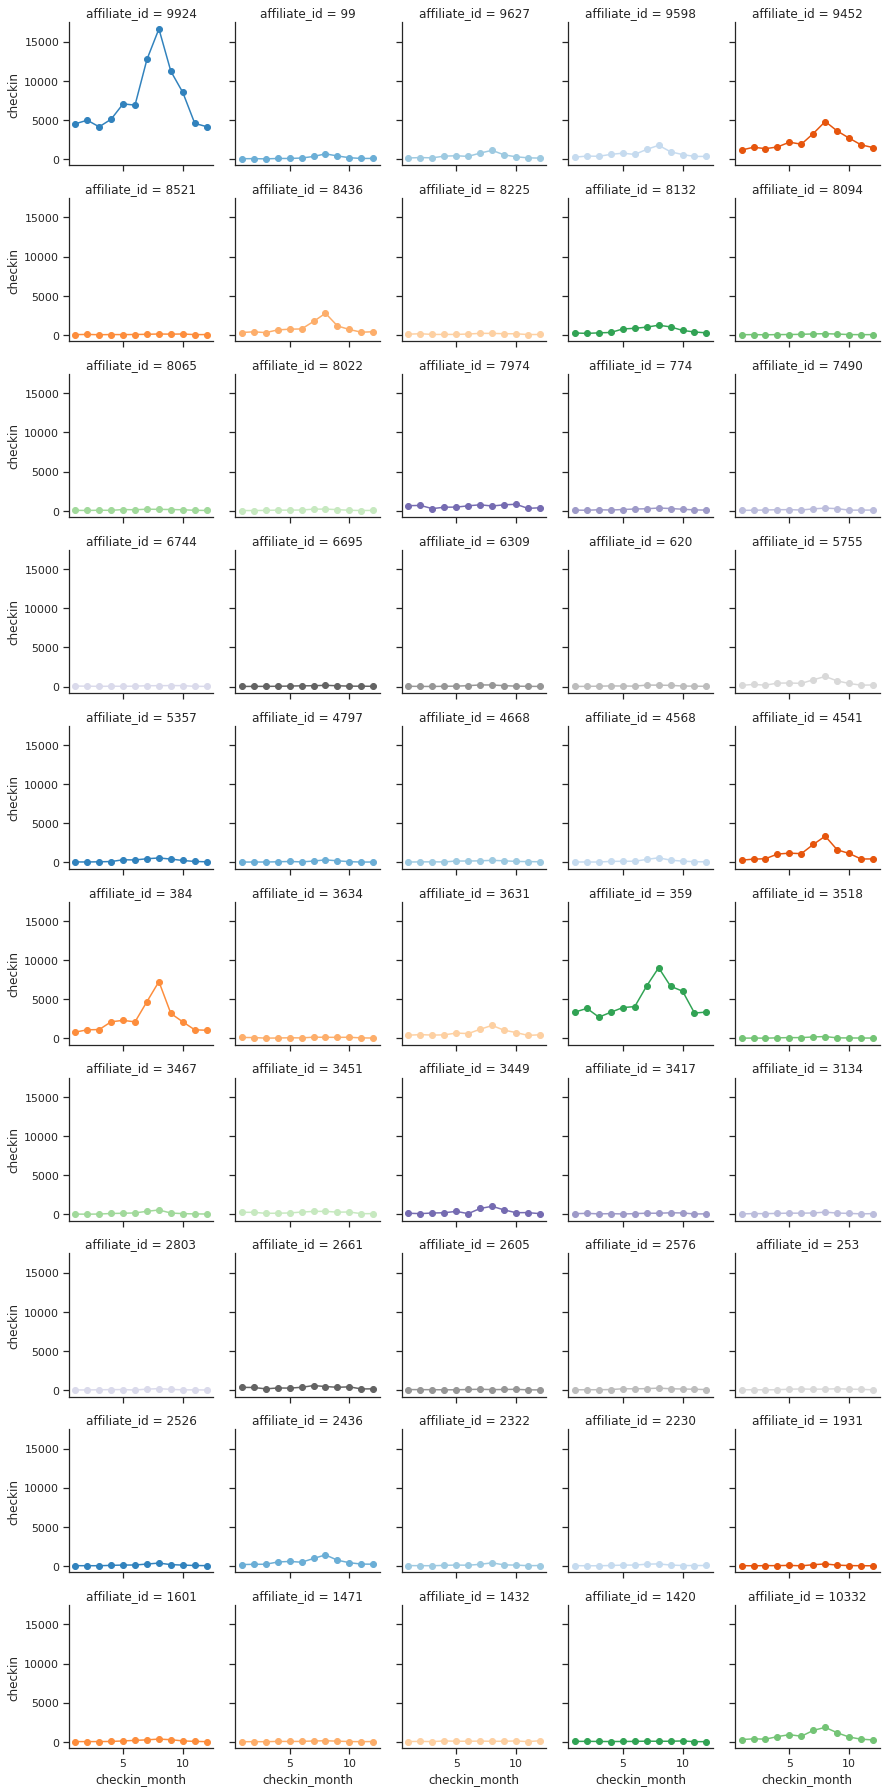

In [27]:
# Initialize a grid of plots with an Axes for each walk
affiliate_id = list(df_group_affiliate.affiliate_id)[:50]
df_plot  = df_affiliate_id_month_group[df_affiliate_id_month_group.affiliate_id.isin(affiliate_id)]

grid     = sns.FacetGrid(df_plot, 
                         col="affiliate_id", hue="affiliate_id", palette="tab20c",
                         col_wrap=5, height=2.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


## booker_country

- booker_country - Country from which the reservation was made (anonymized)

In [28]:
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country,duration,checkin_month
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh,2,7
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh,2,7
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh,3,7
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN,3,7
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire,1,2


In [29]:
df_group_booker_country = df.groupby('booker_country').agg({'checkin': 'count', 'duration': 'mean'})\
                        .sort_values('checkin',ascending=False)
df_group_booker_country.describe()

,checkin,duration
count,5.000000,5.000000
mean,75733.400000,1.838530
std,64657.688192,0.287650
min,9345.000000,1.596658
25%,27057.000000,1.714277
50%,74970.000000,1.767094
75%,93417.000000,1.777849
max,173878.000000,2.336771


In [30]:
df_group_booker_country.head()

,checkin,duration
booker_country,,
Gondal,173878,1.714277
The Devilfire Empire,93417,1.596658
Elbonia,74970,1.767094
Tcherkistan,27057,2.336771
Bartovia,9345,1.777849


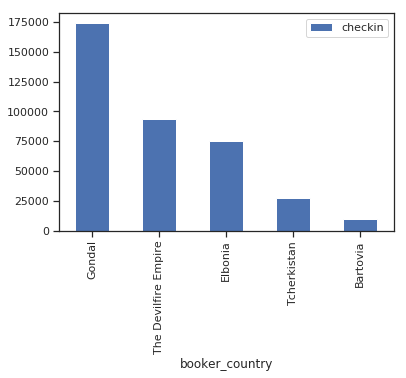

In [31]:
df_group_booker_country[['checkin']].plot(kind='bar')

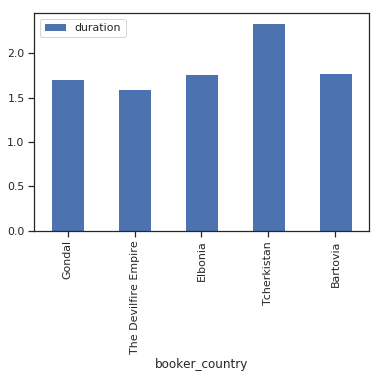

In [32]:
df_group_booker_country[['duration']].plot(kind='bar')

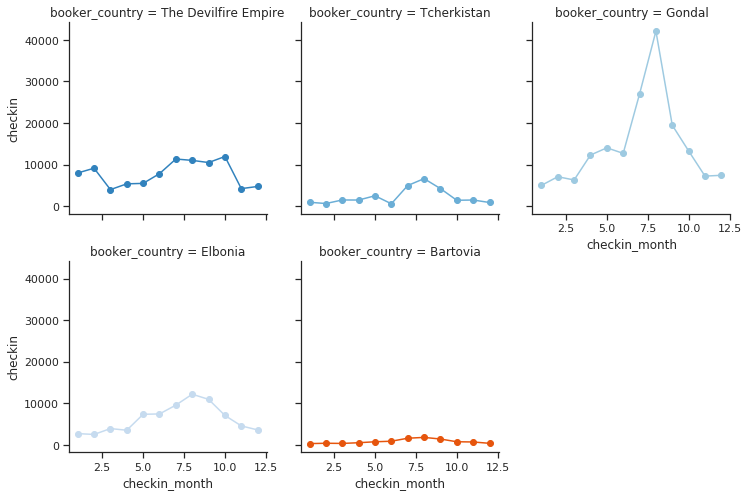

In [33]:
df_group_month_booker_country = df.groupby(['booker_country', 'checkin_month'])\
                                    .agg({'checkin': 'count', 'duration': 'mean'})\
                                    .reset_index()\
                                    .sort_values(['booker_country', 'checkin_month', 'checkin'], ascending=False)

grid     = sns.FacetGrid(df_group_month_booker_country, 
                         col="booker_country", hue="booker_country", palette="tab20c",
                         col_wrap=3, height=3.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


## hotel_country

- hotel_country - Country of the hotel (anonymized)

In [34]:
df_hotel_country_group = df.groupby('hotel_country').agg({'checkin': 'count', 'duration': 'mean'})\
                    .sort_values('checkin',ascending=False)

df_hotel_country_group.describe()

,checkin,duration
count,167.000000,167.000000
mean,1844.341317,1.952695
std,4984.792860,0.672549
min,1.000000,1.000000
25%,8.500000,1.546465
50%,109.000000,1.833333
75%,1047.000000,2.157072
max,37667.000000,7.000000


In [35]:
df_hotel_country_group.shape

(167, 2)

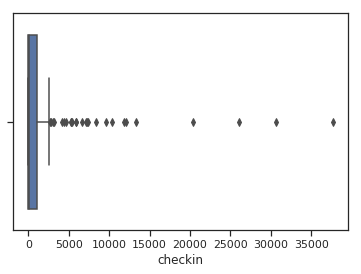

In [36]:
sns.boxplot(x="checkin", data=df_hotel_country_group)

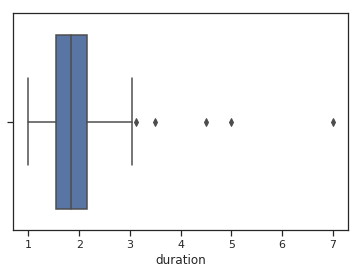

In [37]:
sns.boxplot(x="duration", data=df_hotel_country_group)

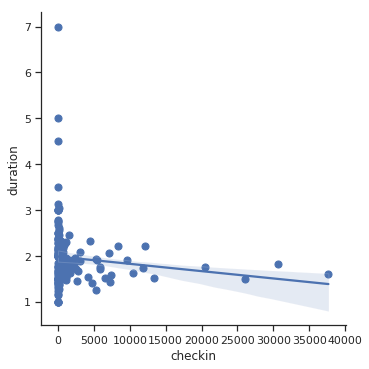

In [38]:
sns.lmplot(x="checkin", y="duration", data=df_hotel_country_group, 
           scatter_kws={"s": 50, "alpha": 1})

In [39]:
df_hotel_country_group

,checkin,duration
hotel_country,,
Cobra Island,37667,1.606871
Fook Island,30694,1.810908
Gondal,26032,1.494776
Glubbdubdrib,20414,1.763839
Elbonia,13350,1.503296
...,...,...
Chinese Federation,1,2.000000
Gondour,1,2.000000
San Marcos,1,1.000000


In [40]:
df_hotel_country_month_group = df.groupby(['hotel_country', 'checkin_month']).agg({'checkin': 'count', 'duration': 'mean'})\
                    .reset_index().sort_values(['hotel_country', 'checkin_month', 'checkin'],ascending=False)
df_hotel_country_month_group

,hotel_country,checkin_month,checkin,duration
1423,Zephyria,12,23,2.478261
1422,Zephyria,11,23,2.478261
1421,Zephyria,10,12,1.500000
1420,Zephyria,9,15,1.666667
1419,Zephyria,8,51,1.784314
...,...,...,...,...
4,Absurdistan,9,5,1.400000
3,Absurdistan,8,3,1.333333
2,Absurdistan,7,4,1.000000
1,Absurdistan,5,1,2.000000


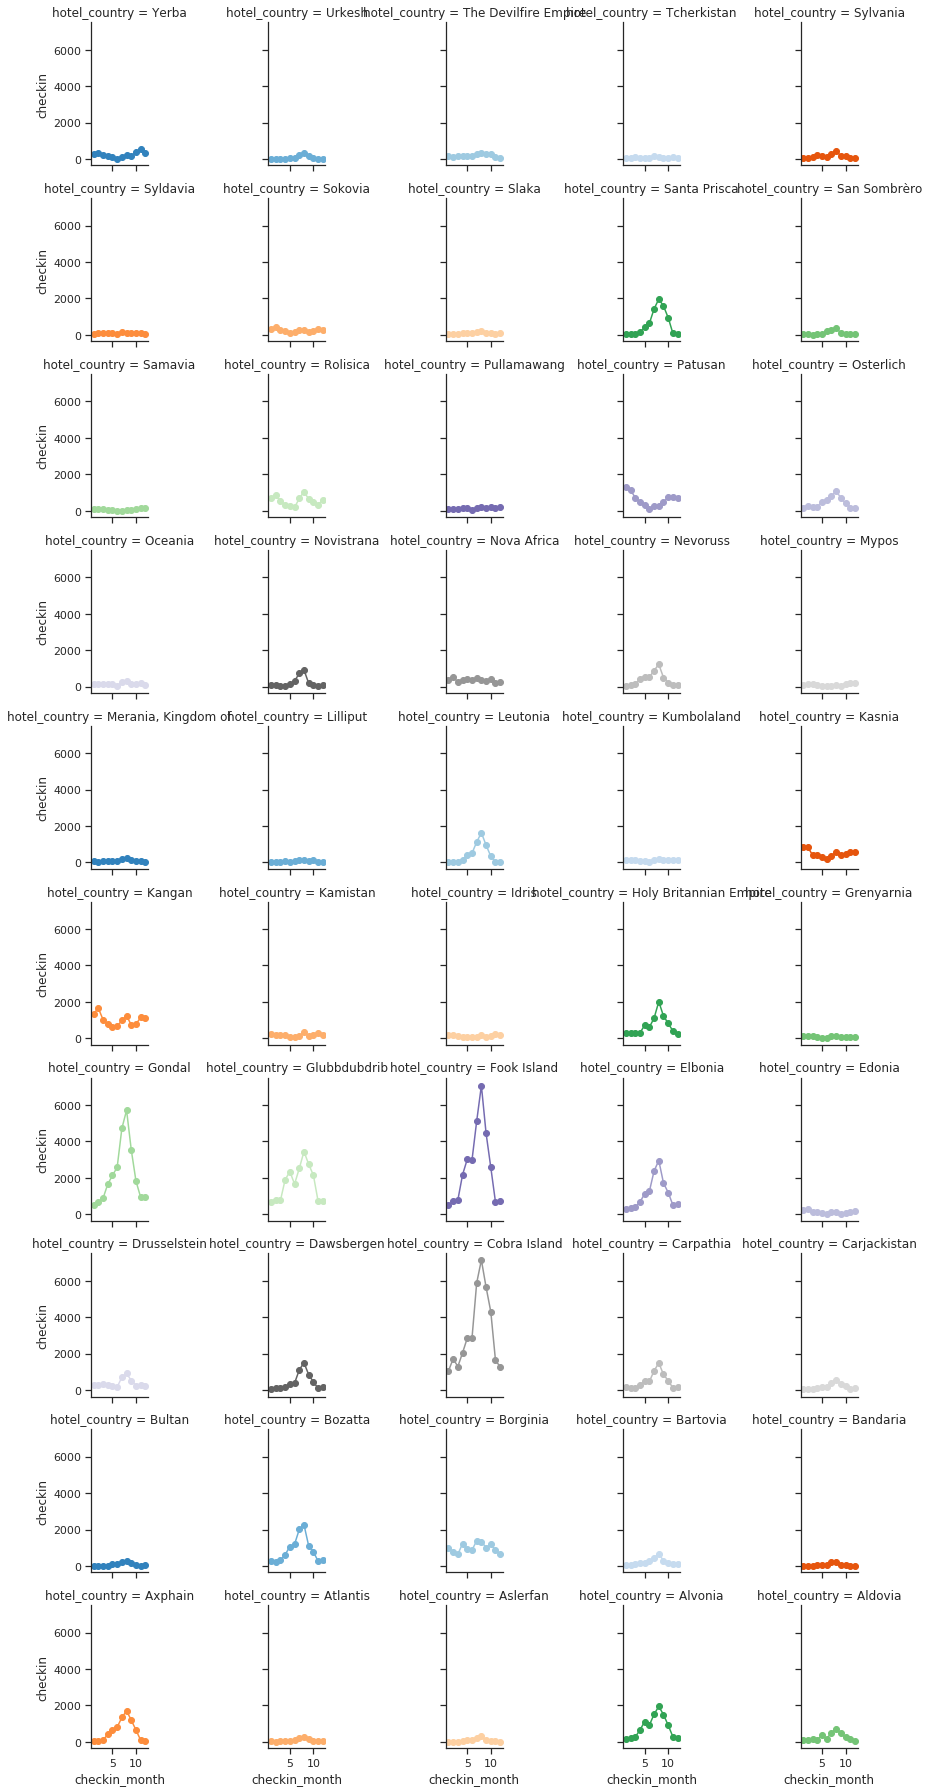

In [41]:
# Initialize a grid of plots with an Axes for each walk
coutry_idx = list(df_hotel_country_group.index)[:50]
df_plot  = df_hotel_country_month_group[df_hotel_country_month_group.hotel_country.isin(coutry_idx)]

grid     = sns.FacetGrid(df_plot, col="hotel_country", hue="hotel_country", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.plot, "checkin_month", "checkin", marker="o")
grid.fig.tight_layout(w_pad=1)


### city_id by booker_country

In [46]:
df_city_id_by_hotel_country = df[['hotel_country', 'city_id']].drop_duplicates()\
                                .groupby('hotel_country').count().sort_values('city_id',ascending=False)
df_city_id_by_hotel_country = df_city_id_by_hotel_country.join(df_hotel_country_group)
df_city_id_by_hotel_country

,city_id,checkin,duration
hotel_country,,,
Gondal,6440,104979,1.494070
Fook Island,3986,117717,1.781688
Cobra Island,3582,137791,1.637836
Elbonia,3414,53965,1.489354
Glubbdubdrib,2898,74840,1.763055
...,...,...,...
Nuevo Rico,1,1,1.000000
Buenaventura,1,1,3.000000
Moldavia,1,6,2.166667


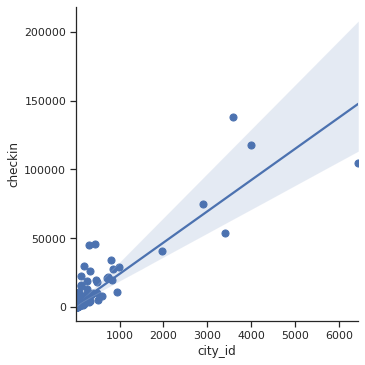

In [47]:
sns.lmplot(x="city_id", y="checkin", data=df_city_id_by_hotel_country, 
           scatter_kws={"s": 50, "alpha": 1})

## utrip_id

- **utrip_id** - Unique identification of user’s trip (a group of multi-destinations bookings within the same trip)

In [42]:
df.head()

,user_id,checkin,checkout,device_class,affiliate_id,booker_country,utrip_id,row_num,total_rows,city_id,hotel_country,duration,checkin_month
0,1000066,2016-07-21,2016-07-23,desktop,9924,Gondal,1000066_2,1,4,56430,Urkesh,2,7
1,1000066,2016-07-23,2016-07-25,desktop,9924,Gondal,1000066_2,2,4,41971,Urkesh,2,7
2,1000066,2016-07-25,2016-07-28,desktop,9924,Gondal,1000066_2,3,4,5797,Urkesh,3,7
3,1000066,2016-07-28,2016-07-31,mobile,2436,Gondal,1000066_2,4,4,0,NaN,3,7
4,1000270,2016-02-08,2016-02-09,mobile,9452,The Devilfire Empire,1000270_1,1,4,50075,The Devilfire Empire,1,2


In [43]:
def count_hotel(hotel_country):
    return len(list(np.unique(hotel_country)))

def join_city(city):
    return "_".join(list(city))

df_utrip_id_group = df.groupby('utrip_id').agg({'checkin': 'count', 
                                                'duration': ['mean', 'sum'], 
                                                'hotel_country': count_hotel,
                                                'city_id': join_city})
df_utrip_id_group.columns = ["_".join(pair) for pair in df_utrip_id_group.columns]
df_utrip_id_group = df_utrip_id_group.sort_values('checkin_count', ascending=False)

df_utrip_id_group['multiply_country'] = (df_utrip_id_group['hotel_country_count_hotel'] > 1).astype(int)
df_utrip_id_group
#df_utrip_id_group.describe()

TypeError: '<' not supported between instances of 'float' and 'str'

In [76]:
df_utrip_id_group.shape

(217686, 5)

/home/marlesson/anaconda3/envs/booking_challenge/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


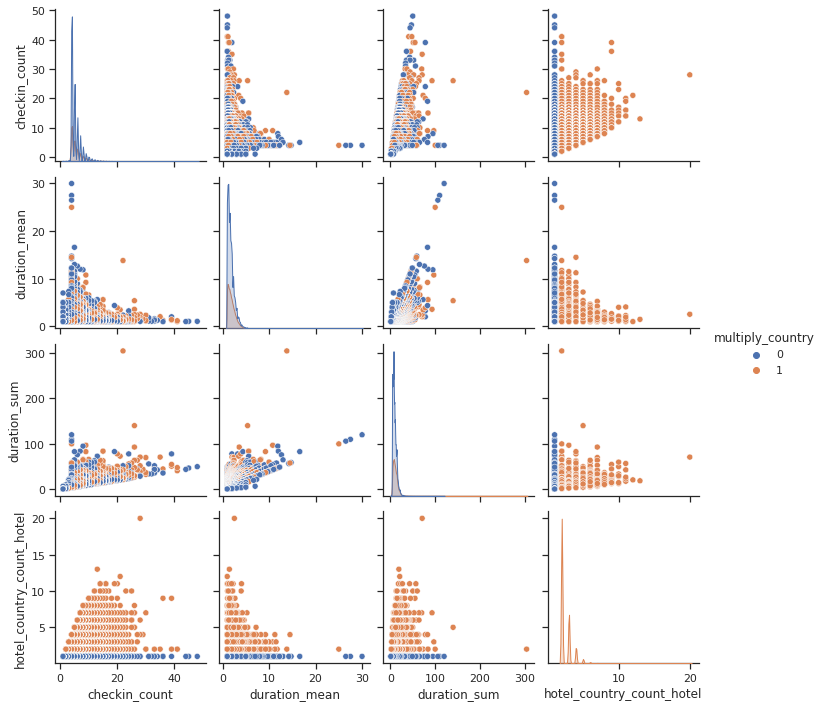

In [75]:
sns.pairplot(df_utrip_id_group, hue="multiply_country")


In [71]:
df_utrip_id_group.describe()

,checkin_count,duration_mean,duration_sum,hotel_country_count_hotel,multiply_country
count,217686.000000,217686.000000,217686.000000,217686.000000,217686.000000
mean,5.360175,1.781976,9.322262,1.414092,0.277932
std,2.014324,0.807122,4.759996,0.800053,0.447981
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.200000,6.000000,1.000000,0.000000
50%,5.000000,1.571429,8.000000,1.000000,0.000000
75%,6.000000,2.166667,12.000000,2.000000,1.000000
max,48.000000,30.000000,304.000000,20.000000,1.000000


<AxesSubplot:xlabel='checkin_count'>

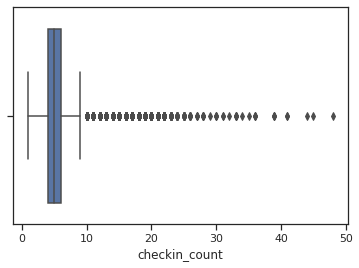

In [72]:
sns.boxplot(x="checkin_count", data=df_utrip_id_group)

<AxesSubplot:xlabel='hotel_country_count_hotel'>

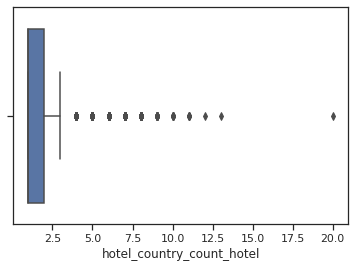

In [73]:
sns.boxplot(x="hotel_country_count_hotel", data=df_utrip_id_group)

<AxesSubplot:xlabel='duration_sum'>

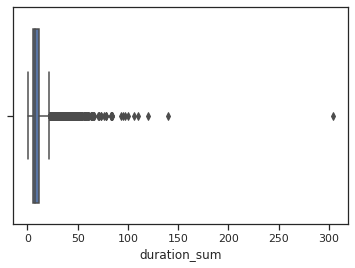

In [74]:
sns.boxplot(x="duration_sum", data=df_utrip_id_group)

Dataset has a lot of outliers

### df_utrip_id_group

In [95]:
df_utrip_id_group_join_city = df_utrip_id_group.groupby("city_id_join_city")\
                    .agg({'checkin_count': 'count',
                         'duration_sum': 'mean'})\
                    .sort_values('checkin_count', ascending=False)

df_utrip_id_group_join_city

,checkin_count,duration_sum
city_id_join_city,,
51259_51259_51259_51259,379,7.424802
36063_36063_36063_36063,166,6.337349
64876_55128_9608_17127,148,9.229730
52815_52815_52815_52815,136,7.227941
51259_51259_51259_51259_51259,134,9.261194
...,...,...
29319_40794_12302_65322_23921,1,8.000000
29319_40794_12975_3914_27079_48483,1,15.000000
29319_40794_18673_48483_5325_29319_29319,1,12.000000


In [96]:
df_utrip_id_group_join_city.describe()

,checkin_count,duration_sum
count,200701.000000,200701.000000
mean,1.084628,9.409662
std,1.517550,4.765061
min,1.000000,1.000000
25%,1.000000,6.000000
50%,1.000000,8.000000
75%,1.000000,12.000000
max,379.000000,304.000000


In [89]:
df[df.city_id == '51259']

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
269,269,1341253,2016-12-08,2016-12-10,51259,mobile,9452,Elbonia,Oceania,1341253_5,2,12
270,270,1341253,2016-12-10,2016-12-11,51259,mobile,9452,Elbonia,Oceania,1341253_5,1,12
1142,1142,2171055,2016-09-26,2016-09-30,51259,mobile,384,Gondal,Oceania,2171055_1,4,9
1740,1740,2729915,2016-05-29,2016-05-31,51259,mobile,9452,Tcherkistan,Oceania,2729915_1,2,5
1741,1741,2729915,2016-05-31,2016-06-02,51259,mobile,9452,Tcherkistan,Oceania,2729915_1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1165034,1165034,5038716,2016-05-01,2016-05-02,51259,mobile,9452,Tcherkistan,Oceania,5038716_1,1,5
1165179,1165179,5183986,2016-01-10,2016-01-13,51259,desktop,2803,Tcherkistan,Oceania,5183986_1,3,1
1165180,1165180,5183986,2016-01-13,2016-01-16,51259,mobile,359,Tcherkistan,Oceania,5183986_1,3,1
1166267,1166267,61218,2016-11-16,2016-11-17,51259,desktop,9924,The Devilfire Empire,Oceania,61218_2,1,11


In [93]:
df[df.utrip_id == '5038716_1']

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,duration,checkin_month
1165031,1165031,5038716,2016-04-28,2016-04-29,51259,desktop,4797,Tcherkistan,Oceania,5038716_1,1,4
1165032,1165032,5038716,2016-04-29,2016-04-30,51259,desktop,4797,Tcherkistan,Oceania,5038716_1,1,4
1165033,1165033,5038716,2016-04-30,2016-05-01,51259,mobile,10332,Tcherkistan,Oceania,5038716_1,1,4
1165034,1165034,5038716,2016-05-01,2016-05-02,51259,mobile,9452,Tcherkistan,Oceania,5038716_1,1,5
